In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

$f(x_0 + h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2!}h^2 + \frac{f'''(x_0)}{3!}h^3 + o(h^3)$

$\left| f'(x_0) - \frac{f(x_0 + h) - f(x_0-h)}{2h} \right| = \left| \frac{f'''(x_0)}{6}h^2 + O(h^5)\right|$ 

Если $\left| f'''(x_0)\right| \leq M_3$, то $\varepsilon_{Method} \simeq \frac{M_3 h^2}{6}$

$\varepsilon_{Comp} \simeq \frac{2\Delta f}{2h} = \frac{\Delta f}{h}$

$\varepsilon = \varepsilon_{Method} + \varepsilon_{Comp}$

Минимизируем итоговую ошибку, состояющую из ошибки вычисления функции в точках и ошибки метода

$\varepsilon ' = 0 \Leftrightarrow  h^* = \sqrt[3]{\frac{3\Delta f}{M_3}}$

Для $\Delta f = 0.1$(одно стандартное отклонение), $M_3 \simeq \frac{p_0 3!}{t_0^3} = \frac{200 \cdot 6}{1000^3} = 1.2 \cdot 10^{-6}$, получаем $h^* = 63$. Расстояние между точками равно $1$, т.е. нужно вычислять производную как 
$f'(x_0) = \frac{f(x_{i+k}) - f(x_{i-k})}{2k}$, где $k$ равно $63$. Для $h^*\simeq 63$ теоретическая оценка ошибки равна $\varepsilon^* \simeq 0.00238$

In [62]:
#Задание 1
M3 = 1.2 * 10**(-6)
df = 0.1
h_opt = (3 * df / M3)**(1/3)
eps_opt = df / h_opt + M3 * h_opt ** 2 / 6

print(h_opt) 
print(eps_opt)

62.99605249474365
0.0023811015779522994


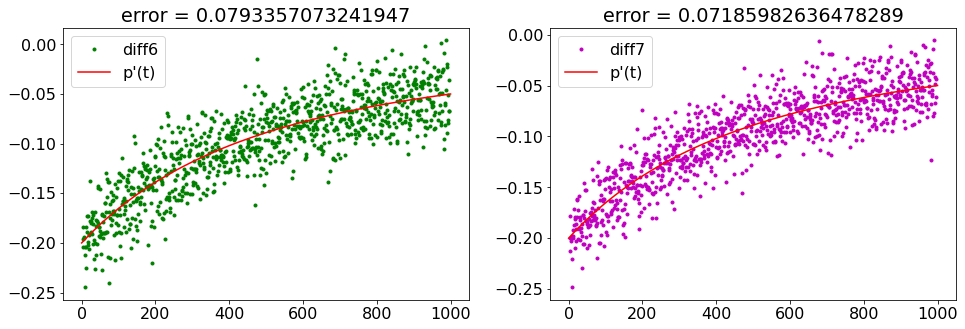

In [63]:
def diffk(t, p, k):
    return (p[k:] - p[:-k]) / (t[k:] - t[:-k])

t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

pprime = -p0 / t0 / (1 + t / t0)**2; 
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[3:-3], diffk(t, p, 6), 'g.', label="diff6")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diffk(t, p, 6) - pprime[3:-3]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[3:-4], diffk(t, p, 7), 'm.', label="diff7")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diffk(t, p, 7) - pprime[3:-4]).max()))
plt.legend(loc='best')

Text(0.5, 1.0, 'min_error=0.0026807074405738873')

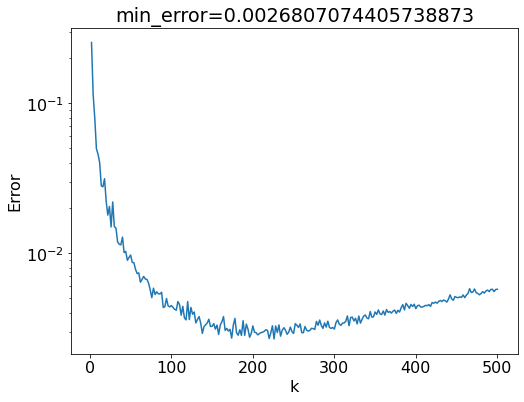

In [64]:
k = np.arange(2, 501, 2)
err = []

for i in k:
    err.append(np.abs(diffk(t, p, i) - pprime[i//2:-i//2]).max())

plt.figure(figsize=(8,6))
plt.plot(k, err)
plt.yscale("log")
plt.ylabel("Error")
plt.xlabel("k")
plt.title("min_error={}".format(np.min(err)))

Text(0.5, 1.0, 'error = 0.10222439663059718')

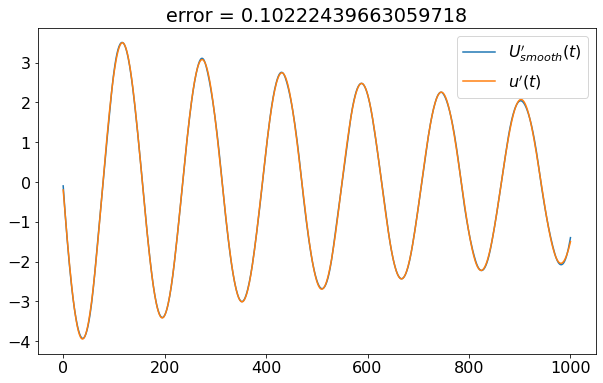

In [65]:
#Конец задания 1
#Задание 2
Usmooth = UnivariateSpline(t, u, s=len(t)//4)

plt.figure(figsize=(10, 6))
plt.plot(t, Usmooth.derivative()(t), label="$U_{smooth}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Usmooth.derivative()(t)).max()))


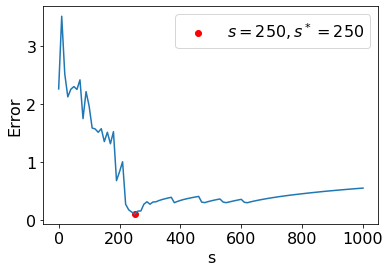

In [66]:
s = np.arange(0, 1001, 10)
err = []
for i in s:
    Usmooth = UnivariateSpline(t, u, s=i)
    err.append(np.abs(uprime - Usmooth.derivative()(t)).max())
plt.plot(s, err)
plt.xlabel("s")
plt.ylabel("Error")

idx = np.argmin(err)

plt.scatter(s[idx], err[idx], color="red", label="$s={}, s^*={}$".format(s[idx], 250))
plt.legend()

In [ ]:
#Конец задания 2
#Задание 3

$\varepsilon_{comp} = \frac{18\Delta f}{12h} = \frac{3\Delta f}{2h}$

Первые производные сократятся с $f'(x_0)$, вторые и четвёртые в силу чётности, третьи в силу $2^3 = 8$, останутся пятые производные. Тогда $\left| f'(x_0) - \hat{f'}(x_0) \right| = \frac{7M_5 }{90}h^4 + O(h^7)$

$\varepsilon_{method} = \frac{7M_5 }{90}h^4$


$h^* = \sqrt[5]{\frac{135\Delta f}{28M_5}}$

$\varepsilon^* =  \frac{3\Delta f}{2h^*} + \frac{7M_5 }{90}{h^{*}}^{4}$

In [68]:
#Конец задания 3
#Задание 4
def diffur4(t, p, k):
    return t[2*k:-2*k], ((np.roll(p, 2*k) - np.roll(p, -2*k) + 8*(np.roll(p, -k) - np.roll(p, k))) / (6*(np.roll(t, -k) - np.roll(t, k))))[2*k:-2*k]

w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

Text(0.5, 1.0, 'error = 1.1828707860313008')

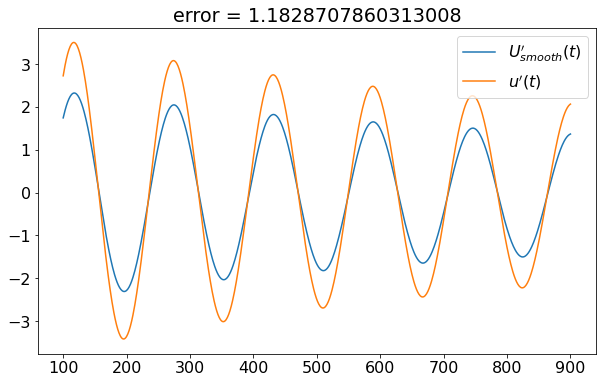

In [69]:
Usmooth = UnivariateSpline(t, u, s=260)

k = 50
tt, dU = diffur4(t, Usmooth(t), k)
plt.figure(figsize=(10, 6))
plt.plot(tt, dU, label="$U_{smooth}'(t)$")
plt.plot(tt, uprime[2*k:-2*k], label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime[2*k:-2*k] - dU).max()))

In [60]:
#Конец задания 4
#Задание 5

Погрешность метода пристального вглядывания для $x_{1,2}=0$ отсутствует, это особый случай. Для $x_3=-\frac{b}{a}$ погрешность считается как $\varepsilon_{method} = \frac{b}{a}\sqrt{\left(\frac{\Delta a}{a}\right)^2+\left(\frac{\Delta b}{b}\right)^2}=4\sqrt{17/16
\cdot 10^{-6}}\simeq 4\cdot 10^{-3}, \varepsilon_{comp} = 0.01\cdot 10^{-3}$ - погрешность округления

$\varepsilon = 4\cdot 10^{-3}$

In [59]:
#Конец задания 5
#Задание 6

$x_n = (x_0+1) 5^n - 1$

$x_0=-1 \Rightarrow x_n=x_0=-1$ 

Погрешность при вычислениях растёт как $10^{-6} \rightarrow 5\cdot 10^{-6} \rightarrow[n] \rightarrow 5^{n}\cdot 10^{-6}$, т.е. в случае с $x_0$ относительная погрешность растёт как $5^n$, при других $x_0$ относительная погрешность не меняется